# Scrapping Data 3000 butir

In [4]:
from google_play_scraper import app
import pandas as pd

In [50]:
import numpy as np


# Scrap some reviews aplikasi reku di playstore
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.jobstreet.jobstreet',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    count=3000, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 for only 1 star, 2 for 2 star, 3 for 3 star, 4 for 4 star and 5 for 5 star.
)

df = pd.DataFrame(np.array(result), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f1a58a04-4771-4c48-b995-45086b2d9c63,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nyaman dan tepat the best resposif,5,0,14.22.0,2024-10-16 09:26:33,None,NaT,14.22.0
1,7cffaeb1-7caa-4731-aa59-d90a2c3e6bfb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ni gimanasii daritdi mau bikin akun (register)...,2,0,14.24.1,2024-10-16 05:17:14,None,NaT,14.24.1
2,5b77d089-f835-4b89-a01a-4474545111ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gak bisa masuk,2,0,14.24.1,2024-10-15 18:52:20,None,NaT,14.24.1
3,e4d2d80f-3156-4b5e-8d52-f93b06ac32fd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya mau posting thread tidak bisa terposting,3,0,None,2024-10-15 17:38:22,None,NaT,None
4,b9444331-8a8e-4c96-b8ee-435abcb11e3f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf saya tidak bisa buka jobstreet setiap say...,1,0,None,2024-10-15 14:50:57,None,NaT,None
...,...,...,...,...,...,...,...,...,...,...,...
2995,485e0a96-3595-4406-9685-6931356fdf37,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tetap berikan pelayanan terbaik,5,0,5.51.0,2023-10-23 22:09:46,"Hi, terima kasih bintang limanya. Kami berhada...",2024-03-22 13:42:07,5.51.0
2996,8825a365-5357-45c0-afc8-3a75538e7756,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap,5,0,5.51.0,2023-10-23 21:43:38,"Hi, terima kasih bintang limanya. Kami berhada...",2024-03-22 13:42:08,5.51.0
2997,95933ca0-e44d-4bc0-8d71-3a143113c907,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,5.51.0,2023-10-23 20:52:00,"Hi, terima kasih bintang limanya. Kami berhada...",2024-03-22 13:42:25,5.51.0
2998,b751e37e-576b-4b2e-8a9c-bcad9bc748f2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu untuk para pencari loker👍,4,0,5.51.0,2023-10-23 20:39:01,"Hi, terima kasih bintang limanya. Kami berhada...",2024-03-22 13:42:26,5.51.0


In [51]:
df.to_csv('Dataset/jobstreet_3000_selected.csv', index=False)

# Read CSV

In [155]:
df = pd.read_csv('Dataset/jobstreet_3000_selected4.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f1a58a04-4771-4c48-b995-45086b2d9c63,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nyaman dan tepat the best resposif,5,0,14.22.0,2024-10-16 09:26:33,NaN,NaN,14.22.0
1,7cffaeb1-7caa-4731-aa59-d90a2c3e6bfb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ni gimanasii daritdi mau bikin akun (register)...,2,0,14.24.1,2024-10-16 05:17:14,NaN,NaN,14.24.1
2,5b77d089-f835-4b89-a01a-4474545111ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gak bisa masuk,2,0,14.24.1,2024-10-15 18:52:20,NaN,NaN,14.24.1
3,e4d2d80f-3156-4b5e-8d52-f93b06ac32fd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya mau posting thread tidak bisa terposting,3,0,NaN,2024-10-15 17:38:22,NaN,NaN,NaN
4,b9444331-8a8e-4c96-b8ee-435abcb11e3f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf saya tidak bisa buka jobstreet setiap say...,1,0,NaN,2024-10-15 14:50:57,NaN,NaN,NaN


In [156]:
len(df.index) # menghitung jumlah baris

3000

In [157]:
df[['userName', 'score', 'at', 'content']].head()

,userName,score,at,content
0,Pengguna Google,5,2024-10-16 09:26:33,Nyaman dan tepat the best resposif
1,Pengguna Google,2,2024-10-16 05:17:14,ni gimanasii daritdi mau bikin akun (register)...
2,Pengguna Google,2,2024-10-15 18:52:20,Gak bisa masuk
3,Pengguna Google,3,2024-10-15 17:38:22,saya mau posting thread tidak bisa terposting
4,Pengguna Google,1,2024-10-15 14:50:57,Maaf saya tidak bisa buka jobstreet setiap say...


In [158]:
new_df = df[['userName', 'score', 'at', 'content']]
sorted_df = new_df.sort_values(by=['at'], ascending=False)
sorted_df.head()

,userName,score,at,content
0,Pengguna Google,5,2024-10-16 09:26:33,Nyaman dan tepat the best resposif
1,Pengguna Google,2,2024-10-16 05:17:14,ni gimanasii daritdi mau bikin akun (register)...
2,Pengguna Google,2,2024-10-15 18:52:20,Gak bisa masuk
3,Pengguna Google,3,2024-10-15 17:38:22,saya mau posting thread tidak bisa terposting
4,Pengguna Google,1,2024-10-15 14:50:57,Maaf saya tidak bisa buka jobstreet setiap say...


In [159]:
my_df = sorted_df[['userName', 'score', 'at', 'content']]

In [160]:
my_df = my_df[['content', 'score']]

In [161]:
my_df.head()

,content,score
0,Nyaman dan tepat the best resposif,5
1,ni gimanasii daritdi mau bikin akun (register)...,2
2,Gak bisa masuk,2
3,saya mau posting thread tidak bisa terposting,3
4,Maaf saya tidak bisa buka jobstreet setiap say...,1


# Pelabelan

In [162]:
def pelabelan(skor):
    if skor < 3:
        return 'negatif'
    elif skor == 4:
        return 'positif'
    elif skor == 5:
        return 'positif'
my_df['Label'] = my_df['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
0,Nyaman dan tepat the best resposif,5,positif
1,ni gimanasii daritdi mau bikin akun (register)...,2,negatif
2,Gak bisa masuk,2,negatif
3,saya mau posting thread tidak bisa terposting,3,None
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,negatif
5,good,5,positif
6,Real,5,positif
7,Minta tolong ku gak enak numpang terus ke oran...,1,negatif
8,Sangat bagus,5,positif
9,Cara mudah untuk mencari lowongan kerja dan la...,5,positif


# Wordcloud Klasifikasi Sentimen Semua

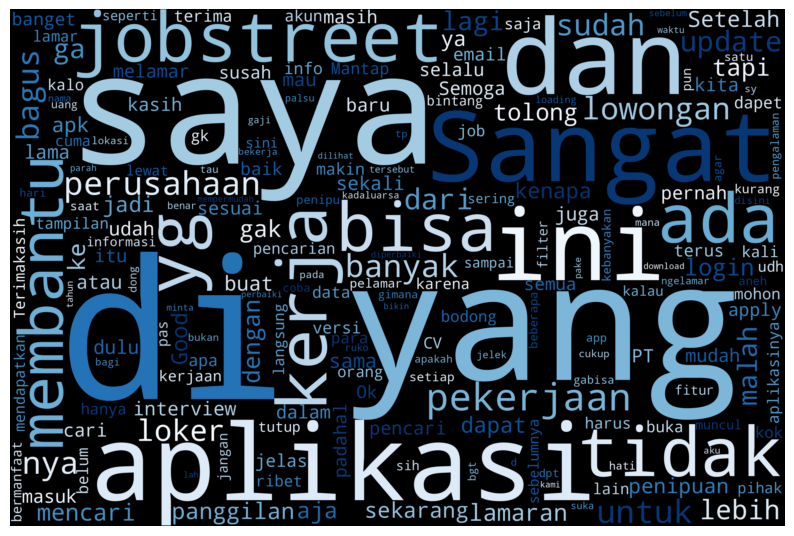

In [166]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# # Filter data untuk hanya menyertakan tweet positif
# netral_tweets = my_df[my_df['Label'] == 'None']

# # Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
# netral_words = ' '.join([tweets for tweets in netral_tweets['content']])

# Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
all_words = ' '.join([tweets for tweets in my_df['content']])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(all_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

# Wordcloud Klasifikasi Sentimen Positif

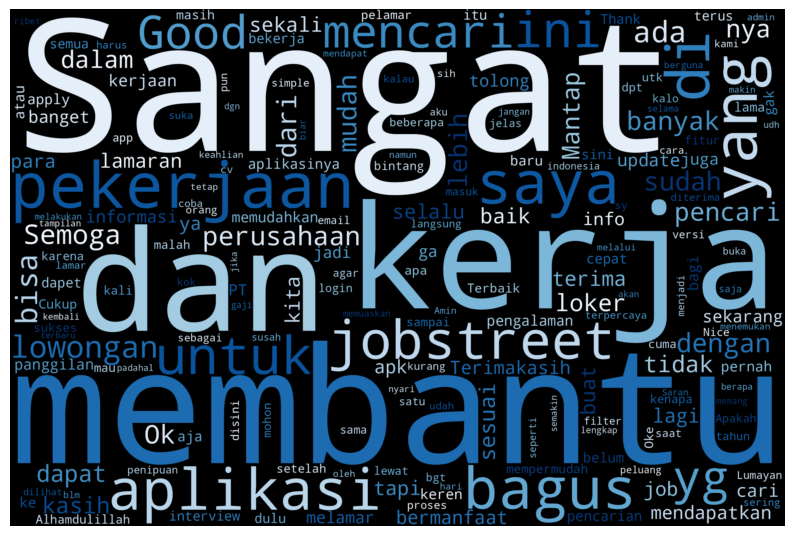

In [183]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# # Filter data untuk hanya menyertakan tweet positif
netral_tweets = my_df[my_df['Label'] == 'positif']

# # Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
netral_words = ' '.join([tweets for tweets in netral_tweets['content']])

# # Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
# all_words = ' '.join([tweets for tweets in my_df['content']])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(netral_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

# Wordcloud Klasifikasi Sentimen Negatif

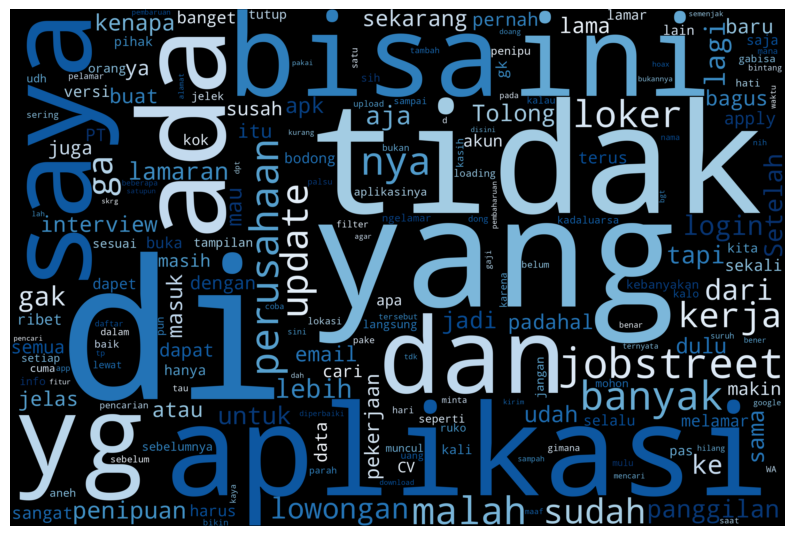

In [181]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# # Filter data untuk hanya menyertakan tweet positif
netral_tweets = my_df[my_df['Label'] == 'negatif']

# # Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
netral_words = ' '.join([tweets for tweets in netral_tweets['content']])

# # Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
# all_words = ' '.join([tweets for tweets in my_df['content']])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(netral_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

In [13]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  3000 non-null   object
 1   score    3000 non-null   int64 
 2   Label    2771 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [14]:
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [15]:
my_df.isna().any()

content    False
score      False
Label       True
dtype: bool

In [16]:
my_df.describe()

,score
count,3000.000000
mean,3.340000
std,1.764116
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [17]:
my_df.isnull().sum()

content      0
score        0
Label      229
dtype: int64

# Handling Missing Value-Ignore Tuple

In [18]:
my_df.dropna(subset=['Label'], inplace=True)

In [19]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [20]:
my_df.head()

,content,score,Label
0,Nyaman dan tepat the best resposif,5,positif
1,ni gimanasii daritdi mau bikin akun (register)...,2,negatif
2,Gak bisa masuk,2,negatif
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,negatif
5,good,5,positif


In [21]:
my_df.to_csv('Dataset/jobstreet_3000_preprocessing.csv', index=False)

# Text PreProcessing

In [22]:
import pandas as pd
df = pd.read_csv('Dataset/jobstreet_3000_preprocessing.csv')
df.head()

,content,score,Label
0,Nyaman dan tepat the best resposif,5,positif
1,ni gimanasii daritdi mau bikin akun (register)...,2,negatif
2,Gak bisa masuk,2,negatif
3,Maaf saya tidak bisa buka jobstreet setiap say...,1,negatif
4,good,5,positif


# Case Folding

Proses case folding adalah proses mengubah seluruh huruf menjadi kecil.

In [23]:
import re
def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].str.replace(r"\d+", "")
    return my_df

In [24]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']

0                      nyaman dan tepat the best resposif
1       ni gimanasii daritdi mau bikin akun (register)...
2                                          gak bisa masuk
4       maaf saya tidak bisa buka jobstreet setiap say...
5                                                    good
                              ...                        
2995                      tetap berikan pelayanan terbaik
2996                                               mantap
2997                                                   ok
2998            sangat membantu untuk para pencari loker👍
2999                                terimakasih jobstreet
Name: text_clean, Length: 2771, dtype: object

In [25]:
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()

,content,score,Label,text_clean
0,Nyaman dan tepat the best resposif,5,positif,nyaman dan tepat the best resposif
1,ni gimanasii daritdi mau bikin akun (register)...,2,negatif,ni gimanasii daritdi mau bikin akun register a...
2,Gak bisa masuk,2,negatif,gak bisa masuk
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,negatif,maaf saya tidak bisa buka jobstreet setiap say...
5,good,5,positif,good


# Stopword Removal

Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Stopword biasanya dihilangkan dalam proses pengolahan teks. contoh dalam bahasa Indonesia seperti "dan", "atau", "yang", "di", "dari", "ke", "dengan", "jika", "ketika", "saat", "atau", "tetapi", "karena", "sehingga", "sebelum", "setelah", "agar", "supaya", "serta", "itulah", "yaitu", "misalnya", "contoh", "adalah", "yakni", "dst". Stopword mempunya informasi rencahan yang kecil, sehingga tidak berpengaruh dalam proses klasifikasi.

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
data_clean['text_Stopword'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anfiniti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_Stopword
0,Nyaman dan tepat the best resposif,5,positif,nyaman dan tepat the best resposif,nyaman the best resposif
1,ni gimanasii daritdi mau bikin akun (register)...,2,negatif,ni gimanasii daritdi mau bikin akun register a...,ni gimanasii daritdi bikin akun register aja g...
2,Gak bisa masuk,2,negatif,gak bisa masuk,gak masuk
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,negatif,maaf saya tidak bisa buka jobstreet setiap say...,maaf buka jobstreet register masuk ga kebuka
5,good,5,positif,good,good
6,Real,5,positif,real,real
7,Minta tolong ku gak enak numpang terus ke oran...,1,negatif,minta tolong ku gak enak numpang terus ke oran...,tolong ku gak enak numpang orang tua dihina di...
8,Sangat bagus,5,positif,sangat bagus,bagus
9,Cara mudah untuk mencari lowongan kerja dan la...,5,positif,cara mudah untuk mencari lowongan kerja dan la...,mudah mencari lowongan kerja langsung melamar
10,Seumur umur pake aplikasi ini belum pernah dap...,2,negatif,seumur umur pake aplikasi ini belum pernah dap...,seumur umur pake aplikasi dapet kerjaan kerjaa...


# Tokenizing

Tokenizing merupakan proses pemisahan text menjadi potongan-potongan yang lebih kecil. Tokenizing dapat dilakukan dengan menggunakan library NLTK.

In [27]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
data_clean['text_tokens'] = data_clean['text_Stopword'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to /home/anfiniti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,text_clean,text_Stopword,text_tokens
0,Nyaman dan tepat the best resposif,5,positif,nyaman dan tepat the best resposif,nyaman the best resposif,"[nyaman, the, best, resposif]"
1,ni gimanasii daritdi mau bikin akun (register)...,2,negatif,ni gimanasii daritdi mau bikin akun register a...,ni gimanasii daritdi bikin akun register aja g...,"[ni, gimanasii, daritdi, bikin, akun, register..."
2,Gak bisa masuk,2,negatif,gak bisa masuk,gak masuk,"[gak, masuk]"
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,negatif,maaf saya tidak bisa buka jobstreet setiap say...,maaf buka jobstreet register masuk ga kebuka,"[maaf, buka, jobstreet, register, masuk, ga, k..."
5,good,5,positif,good,good,[good]


# Stemming

Stemming adalah proses pemetaan dan penguraian bentuk dari kata ke bentuk dasarnya. Stemming dilakukan dengan menghilangkan imbuhan-imbuhan yang terdapat pada kata. Contoh stemming adalah mengubah kata "membaca" menjadi "baca".

In [28]:
!pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable


In [29]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [30]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_tokens_stemmed'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)


4545
------------------------
1 : nyaman : nyaman
2 : the : the
3 : best : best
4 : resposif : resposif
5 : ni : ni
6 : gimanasii : gimanasii
7 : daritdi : daritdi
8 : bikin : bikin
9 : akun : akun
10 : register : register
11 : aja : aja
12 : gabisa2 : gabisa2
13 : tlong : tlong
14 : lh : lh
15 : sistemnya : sistem
16 : diperbaiki : baik
17 : gak : gak
18 : masuk : masuk
19 : maaf : maaf
20 : buka : buka
21 : jobstreet : jobstreet
22 : ga : ga
23 : kebuka : buka
24 : good : good
25 : real : real
26 : tolong : tolong
27 : ku : ku
28 : enak : enak
29 : numpang : numpang
30 : orang : orang
31 : tua : tua
32 : dihina : hina
33 : dimaki : maki
34 : capek : capek
35 : mohon : mohon
36 : nih : nih
37 : aplikasi : aplikasi
38 : bantuin : bantuin
39 : gw : gw
40 : loker : loker
41 : haram : haram
42 : gua : gua
43 : jalanin : jalanin
44 : bagus : bagus
45 : mudah : mudah
46 : mencari : cari
47 : lowongan : lowong
48 : kerja : kerja
49 : langsung : langsung
50 : melamar : lamar
51 : seumur : umu

,content,score,Label,text_clean,text_Stopword,text_tokens,text_tokens_stemmed
0,Nyaman dan tepat the best resposif,5,positif,nyaman dan tepat the best resposif,nyaman the best resposif,"[nyaman, the, best, resposif]",nyaman the best resposif
1,ni gimanasii daritdi mau bikin akun (register)...,2,negatif,ni gimanasii daritdi mau bikin akun register a...,ni gimanasii daritdi bikin akun register aja g...,"[ni, gimanasii, daritdi, bikin, akun, register...",ni gimanasii daritdi bikin akun register aja g...
2,Gak bisa masuk,2,negatif,gak bisa masuk,gak masuk,"[gak, masuk]",gak masuk
4,Maaf saya tidak bisa buka jobstreet setiap say...,1,negatif,maaf saya tidak bisa buka jobstreet setiap say...,maaf buka jobstreet register masuk ga kebuka,"[maaf, buka, jobstreet, register, masuk, ga, k...",maaf buka jobstreet register masuk ga buka
5,good,5,positif,good,good,[good],good
6,Real,5,positif,real,real,[real],real
7,Minta tolong ku gak enak numpang terus ke oran...,1,negatif,minta tolong ku gak enak numpang terus ke oran...,tolong ku gak enak numpang orang tua dihina di...,"[tolong, ku, gak, enak, numpang, orang, tua, d...",tolong ku gak enak numpang orang tua hina maki...
8,Sangat bagus,5,positif,sangat bagus,bagus,[bagus],bagus
9,Cara mudah untuk mencari lowongan kerja dan la...,5,positif,cara mudah untuk mencari lowongan kerja dan la...,mudah mencari lowongan kerja langsung melamar,"[mudah, mencari, lowongan, kerja, langsung, me...",mudah cari lowong kerja langsung lamar
10,Seumur umur pake aplikasi ini belum pernah dap...,2,negatif,seumur umur pake aplikasi ini belum pernah dap...,seumur umur pake aplikasi dapet kerjaan kerjaa...,"[seumur, umur, pake, aplikasi, dapet, kerjaan,...",umur umur pake aplikasi dapet kerja kerja pang...


In [31]:
data_clean.to_csv('Dataset/jobstreet_3000_hasiltextpreprocessing.csv', index=False)

# Pembobotan TF-IDF

TFIDF adalah sebuah metode yang merupakan integrasi antar term frequency(TF) dan inverse document frequency(IDF). Term frequency dihitung menggunakan persamaan. dengan term frequency ke-i adalah frekuensi kemunculan term ke-i dalam dokumen ke-j. Inverse Document Frequency adalah logaritma dari rasio jumlah seluruh dokumen dengan jumlah dokumen yang mengandung term yang dimaksud seperti yang dituliskan secara matematis pada persamaan. Nilai didapatkan dengan mengalikan keduanya yang diformulasikan pada persamaan.

In [32]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [33]:
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    return text

spliting data
memecah data test 20% dari keseluruhan data

In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split

data_clean = pd.read_csv('Dataset/jobstreet_3000_hasiltextpreprocessing.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']

X_train, X_test, y_train, y_test = train_test_split(data_clean['text_tokens_stemmed'], data_clean['Label'], test_size=0.2, random_state=0)

In [188]:
print(A)

0                                nyaman the best resposif
1       ni gimanasii daritdi bikin akun register aja g...
2                                               gak masuk
3              maaf buka jobstreet register masuk ga buka
4                                                    good
                              ...                        
2766                                           layan baik
2767                                               mantap
2768                                                   ok
2769                                     bantu cari loker
2770                                terimakasih jobstreet
Name: text_tokens_stemmed, Length: 2771, dtype: object


In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string
X_train = X_train.fillna('')
X_test = X_test.fillna('')
A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()
X_train_tfid = tfid_vectorizer.fit_transform(X_train)
X_test_tfid = tfid_vectorizer.transform(X_test)
A_tfid = tfid_vectorizer.transform(A)

In [190]:
print(X_train_tfid.shape)
print(y_train.shape)
print(X_test_tfid.shape)
print(y_test.shape)
print(A.shape)
print(A_tfid.shape)

(2216, 3403)
(2216,)
(555, 3403)
(555,)
(2771,)
(2771, 3403)


In [191]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [192]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
A = vectorizer.transform(A)

(0, 372) 1: Ini berarti di dokumen pertama (baris ke-0) ada kata yang berada di kolom indeks ke-372, dan kata tersebut muncul 1 kali.

In [193]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfid, y_train)

MultinomialNB()

In [194]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [195]:
y_pred = nb.predict(X_test_tfid)
B_pred = nb.predict(A_tfid)

In [196]:
data_clean['Label NB'] = B_pred

In [197]:
data_clean = pd.DataFrame(data_clean)
data_clean.head()

,content,score,Label,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB
0,Nyaman dan tepat the best resposif,5,positif,nyaman dan tepat the best resposif,nyaman the best resposif,"['nyaman', 'the', 'best', 'resposif']",nyaman the best resposif,positif
1,ni gimanasii daritdi mau bikin akun (register)...,2,negatif,ni gimanasii daritdi mau bikin akun register a...,ni gimanasii daritdi bikin akun register aja g...,"['ni', 'gimanasii', 'daritdi', 'bikin', 'akun'...",ni gimanasii daritdi bikin akun register aja g...,negatif
2,Gak bisa masuk,2,negatif,gak bisa masuk,gak masuk,"['gak', 'masuk']",gak masuk,negatif
3,Maaf saya tidak bisa buka jobstreet setiap say...,1,negatif,maaf saya tidak bisa buka jobstreet setiap say...,maaf buka jobstreet register masuk ga kebuka,"['maaf', 'buka', 'jobstreet', 'register', 'mas...",maaf buka jobstreet register masuk ga buka,negatif
4,good,5,positif,good,good,['good'],good,positif


In [198]:
data_clean.to_csv('Dataset/jobstreet_3000_hasil_sentimen.csv', index=False)

data_clean2 = pd.read_csv('Dataset/jobstreet_3000_hasil_sentimen.csv')
data_clean2 = pd.DataFrame(data_clean2)
data_clean2.head()


,content,score,Label,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB
0,Nyaman dan tepat the best resposif,5,positif,nyaman dan tepat the best resposif,nyaman the best resposif,"['nyaman', 'the', 'best', 'resposif']",nyaman the best resposif,positif
1,ni gimanasii daritdi mau bikin akun (register)...,2,negatif,ni gimanasii daritdi mau bikin akun register a...,ni gimanasii daritdi bikin akun register aja g...,"['ni', 'gimanasii', 'daritdi', 'bikin', 'akun'...",ni gimanasii daritdi bikin akun register aja g...,negatif
2,Gak bisa masuk,2,negatif,gak bisa masuk,gak masuk,"['gak', 'masuk']",gak masuk,negatif
3,Maaf saya tidak bisa buka jobstreet setiap say...,1,negatif,maaf saya tidak bisa buka jobstreet setiap say...,maaf buka jobstreet register masuk ga kebuka,"['maaf', 'buka', 'jobstreet', 'register', 'mas...",maaf buka jobstreet register masuk ga buka,negatif
4,good,5,positif,good,good,['good'],good,positif


In [199]:
from sklearn.metrics import accuracy_score

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))

Accuracy score: 0.8810810810810811
Accuracy score: 0.9299891735835438


In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
B_pred2 = clf.predict(X_test)

print('MultinomialNB Accuracy: ', accuracy_score(y_test, y_pred2))
print("MultinomialNB Precision: ", precision_score(y_test, y_pred2, average='binary', pos_label='negatif'))
print('MultinomialNB Recall: ', recall_score(y_test, y_pred2, average='binary', pos_label='negatif'))
print('MultinomialNB F1 Score: ', f1_score(y_test, y_pred2, average='binary', pos_label='negatif'))

print(f'confusion matrix:\n{confusion_matrix(y_test, y_pred2)}')
print('=========================================================\n')
print(classification_report(y_test, y_pred2, zero_division=0))

# Load Dataset
data_clean = pd.read_csv('Dataset/jobstreet_3000_hasiltextpreprocessing.csv')

MultinomialNB Accuracy:  0.8756756756756757
MultinomialNB Precision:  0.8283261802575107
MultinomialNB Recall:  0.8693693693693694
MultinomialNB F1 Score:  0.8483516483516483
confusion matrix:
[[193  29]
 [ 40 293]]

              precision    recall  f1-score   support

     negatif       0.83      0.87      0.85       222
     positif       0.91      0.88      0.89       333

    accuracy                           0.88       555
   macro avg       0.87      0.87      0.87       555
weighted avg       0.88      0.88      0.88       555



In [201]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
B_pred2 = clf.predict(A)
B_Actual = data_clean2['Label']

print('MultinomialNB Accuracy: ', accuracy_score(B_Actual, B_pred2))
print("MultinomialNB Precision: ", precision_score(B_Actual, B_pred2, average='binary', pos_label='negatif'))
print('MultinomialNB Recall: ', recall_score(B_Actual, B_pred2, average='binary', pos_label='negatif'))
print('MultinomialNB F1 Score: ', f1_score(B_Actual, B_pred2, average='binary', pos_label='negatif'))

print(f'confusion matrix:\n{confusion_matrix(B_Actual, B_pred2)}')
print('=========================================================\n')
print(classification_report(B_Actual, B_pred2, zero_division=0))

# Save Dataset
data_clean2['Label NB'] = B_pred2
data_clean2.to_csv('Dataset/jobstreet_2711_hasil_sentimen.csv', index=False)

MultinomialNB Accuracy:  0.9252977264525442
MultinomialNB Precision:  0.8970331588132635
MultinomialNB Recall:  0.9203222918531782
MultinomialNB F1 Score:  0.9085285019885109
confusion matrix:
[[1028   89]
 [ 118 1536]]

              precision    recall  f1-score   support

     negatif       0.90      0.92      0.91      1117
     positif       0.95      0.93      0.94      1654

    accuracy                           0.93      2771
   macro avg       0.92      0.92      0.92      2771
weighted avg       0.93      0.93      0.93      2771

